# **Project 2**, APS1070 Winter 2024
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: Feb 27, 11 PM - 13 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: 
*   Student Number: 

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



In [ ]:
%%shell
jupyter nbconvert --to html /content/APS1070_Project_2.ipynb

[NbConvertApp] Converting notebook /content/APS1070_Project_2.ipynb to html
[NbConvertApp] Writing 3976171 bytes to /content/APS1070_Project_2.html


##**Part 1: Getting started [1.5 Marks]**

We are going to work with a [Landsat Satellite](hhttps://archive.ics.uci.edu/dataset/146/statlog+landsat+satellite) dataset, consisting of multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the classification associated with the central pixel in each neighbourhood. One frame of Landsat MSS imagery consists of four digital images of the same scene in different spectral bands. Each pixel is a 8-bit binary word, with 0 corresponding to black and 255 to white. The database is a sub-area of a scene, consisting of 82 x 100 pixels. Each line of data corresponds to a 3x3 square neighbourhood of pixels completely contained within the 82x100 sub-area. Each line contains the pixel values in the four spectral bands (converted to ASCII) of each of the 9 pixels in the 3x3 neighbourhood and a label assigned to the central pixel indicating if the image is classified as any types of soil, or a cotton crop. The aim is to predict the class, given the multi-spectral values (`Attribute1`, `Attribute2`, … `Attribute36`).
Load the dataset in CSV file using Pandas. The dataset is called `LandsatSatellite.csv`. Print out the first few columns of the dataset.


* How many rows are there? **5803    [0.1]**
* Which column contains the targets? **isanomaly (last column)  [0.1]**
* What is the meaning of target values? **The target has two values (0 or 1) indicating if that sample (row) is a case of anomaly or not. 5732 normal and 71 anomalies    [0.2]**

In [ ]:
pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=892b79f519f82257a76d6fbc0523713ca78835e49e7a84d47db157105360228f
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import wget

wget.download('https://raw.githubusercontent.com/Sabaae/Dataset/master/LandsatSatellite.csv')

'LandsatSatellite.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score , roc_curve
from sklearn.mixture import GaussianMixture


In [ ]:
'''
Abdullah: Replying to

Load the dataset in CSV file using Pandas.
The dataset is called LandsatSatellite.csv.
Print out the first few columns of the dataset.
---------------------------------------------------------------

'''


#Load the dataset in CSV file using Pandas
df = pd.read_csv("LandsatSatellite.csv")

#Print out the first few columns of the dataset.
df.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Attribute35,Attribute36,isanomaly
0,92.0,115.0,120.0,94.0,84.0,102.0,106.0,79.0,84.0,102.0,...,104.0,88.0,121.0,128.0,100.0,84.0,107.0,113.0,87.0,0.0
1,84.0,102.0,106.0,79.0,84.0,102.0,102.0,83.0,80.0,102.0,...,100.0,84.0,107.0,113.0,87.0,84.0,99.0,104.0,79.0,0.0
2,84.0,102.0,102.0,83.0,80.0,102.0,102.0,79.0,84.0,94.0,...,87.0,84.0,99.0,104.0,79.0,84.0,99.0,104.0,79.0,0.0
3,80.0,102.0,102.0,79.0,84.0,94.0,102.0,79.0,80.0,94.0,...,79.0,84.0,99.0,104.0,79.0,84.0,103.0,104.0,79.0,0.0
4,84.0,94.0,102.0,79.0,80.0,94.0,98.0,76.0,80.0,102.0,...,79.0,84.0,103.0,104.0,79.0,79.0,107.0,109.0,87.0,0.0


In [ ]:
### YOUR CODE HERE ###
'''
Abdullah: Replying to

How many rows are there? _____ [0.1]
Which column contains the targets? [0.1]
What is the meaning of target values?_____ [0.2]
---------------------------------------------------------------

'''
print("How many rows are there?:\n", df.shape[0])
print("\nWhich column contains the targets?\n", df.columns[-1])


print("\nWhat is the meaning of target values?")
print("The target has two values (0 or 1) indicating if that \nsample (row) is a case of anomaly or not. 5732 normal and 71 anomalies \n\n ")


# Target column is "isanomaly"
isanomaly_counts = df['isanomaly'].value_counts()

# Display the counts
print("isanomaly Counts: \n",isanomaly_counts)


How many rows are there?:
 5803

Which column contains the targets?
 isanomaly

What is the meaning of target values?
The target has two values (0 or 1) indicating if that 
sample (row) is a case of anomaly or not. 5732 normal and 71 anomalies 

 
isanomaly Counts: 
 0.0    5732
1.0      71
Name: isanomaly, dtype: int64


It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? **98.78% for class 0 and 1.22% for class 1  [0.1]**
* Is this data considered balanced or unbalanced? Why is this the case? **Imbalanced. (Explanation in the cell below) [0.1]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? **(explanation is provided in the cell below) [0.2]**


In [ ]:
### YOUR CODE HERE ###
'''
Abdullah Replying to:

It's important to know how many examples we have for each class
when we work with a new dataset.

What is the percentage of entries in the dataset for each class? _____ [0.1]

Is this data considered balanced or unbalanced? Why is this the case?_____ [0.1]

Why is balance/imbalance important? How might this class ditribution affect a
KNN classifier for example, which we explored in Project 1? _____ [0.2]


'''
# What is the percentage of entries in the dataset for each class?
# ------------------------------------------------------------------------
total = len(df)
isanomaly_counts = df['isanomaly'].value_counts()

# Calculate the percentage for each class
percentage_zeros = (isanomaly_counts[0] / total) * 100
percentage_ones = (isanomaly_counts[1] / total) * 100

# Display the percentages
print(f"Percentage of zeros: {percentage_zeros:.2f}%") #98.78%
print(f"Percentage of ones: {percentage_ones:.2f}%") #1.22%

#------------------------------------------------------------------------

'''

Is this data considered balanced or unbalanced? Why is this the case?_____ [0.1]

------------------------------------------------------------------------
Ans:
The percentage of 0s in the dataset is 98.78%  while the percentage of
1s is 1.22%. This data is considered "imbalanced".

Dataset is considered balanced when the distribution of classes is roughly equal
or close to equal. For our case, the majority class (zeros) is significantly
more than the minority class (ones). Imbalanced datasets can pose challenges
in ML, as models trained on such data may have a bias towards
the majority class
------------------------------------------------------------------------



Why is balance/imbalance important? How might this class ditribution affect a
KNN classifier for example, which we explored in Project 1? _____ [0.2]

--------------------------------------------------------------------------
Ans:

Balance or imbalance in a dataset is important because it can significantly
impact the performance and behavior of machine learning models
including classifiers like K-Nearest Neighbors (KNN).

Explanation (why is the case?):

- Imbalanced datasets may lead to biased models favoring the
majority class. KNN, relying on majority votes from neighbors tends to
predict the majority class more often due to its widespread in training data.

- In imbalanced datasets, accuracy alone is insufficient. High accuracy on the
majority class can mask poor performance on the minority class especially
in anomaly detection scenarios.

- KNN relies on distance metrics, making it sensitive to imbalances. The nearest
neighbors are often from the majority class posing challenges in
identifying instances from the minority class.

- Imbalanced datasets require careful choice of evaluation metrics like
precision, recall, and F1 score.
------------------------------------------------------------------------------


'''



Percentage of zeros: 98.78%
Percentage of ones: 1.22%


Next, split the dataset into a training (70%), validation (15%) and testing set (15%). Set the random state to 0. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [ ]:
### Split the data  ###


#Make sure to separate out the column corresponding to the targets.
X = df.drop(columns=['isanomaly'])
y = df['isanomaly']

# First splitting the data into training (70%) and temporary (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)

# Split the remaining 30% into validation (50%) and testing (50%) (acutally 15% for val and 15% for test of the overall data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)



Now, let's take a look at the difference in distribution for all variables between typical and anomalous satellite images:

Attribute1
Attribute2
Attribute3
Attribute4
Attribute5
Attribute6
Attribute7
Attribute8
Attribute9
Attribute10
Attribute11
Attribute12
Attribute13
Attribute14
Attribute15
Attribute16
Attribute17
Attribute18
Attribute19
Attribute20
Attribute21
Attribute22
Attribute23
Attribute24
Attribute25
Attribute26
Attribute27
Attribute28
Attribute29
Attribute30
Attribute31
Attribute32
Attribute33
Attribute34
Attribute35
Attribute36


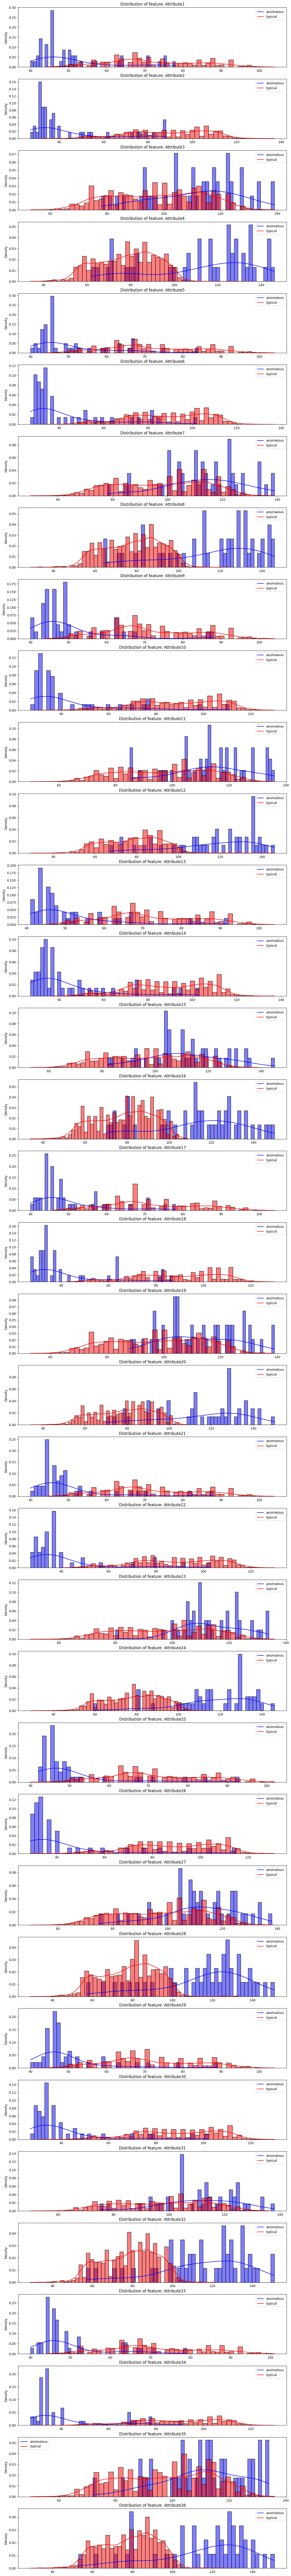

In [ ]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if not 'isanomaly' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    print(feat)
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['anomalous', 'typical'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

The histograms comparing the distribution between typical (red) and anomalous (blue) satellite images can provide meaningful insights for anomaly detection using a Gaussian model in the following ways:

------------------------------------------

**Distribution based analysis:**

A Gaussian model relies on the assumption that normal data follows a certain distribution. If anomalous data significantly deviates from this distribution, it might be easier to detect anomalies.

If the distributions of features for anomalous and typical images are distinctly separated, it indicates that there are clear differences in the patterns of normal and anomalous data.

We can analyze these graphs and look for different distributions. Distinctly separated distributions would help Gaussian model to detect anomalies from normal pattern.

------------------------------------------

**Outliers Identification:**

Anomalies are often belong to regions of low probability in the distribution.

By visually inspecting these histograms, we can identify regions where the anomalous distribution has a low probability compared to the typical distribution.
These regions are likely to be areas where anomalies deviate from the expected patterns and which can provide meaningful information for the anomalies.

------------------------------------------

**Help From Features:**

These graphs help in assessing which features contribute the most to the detection of anomalies. Features with significant differences in distribution between the two classes are likely to be more informative for anomaly detection.
The provided code illustrates meaningful graphs for each attribute.

------------------------------------------
**Model Refinement:**

Observing these histograms can guide the refinement of the Gaussian model.

Some of distributions overlap in certain regions, it might be necessary to consider more sophisticated models to improve anomaly detection performance.


------------------------------------------
**Graphs Based Threshold Selection:**

Determining a threshold for anomaly detection is crucial. This threshold can be set based on the point where the likelihood of being anomalous is significantly lower saving us from false detections.
These histograms can help us in choosing a threshold that maximizes the separation between typical and anomalous instances.


----------------------

In conclusion, these visualizations serve as an investigative analysis tool aiding in understanding the characteristics of the data and informing the design and tuning of an anomaly detection model based on Gaussian assumptions.






## **Part 2: Single feature model with one Gaussian distribution: [2.5 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``.
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table.
  4. Find the best 3 features to distinguish anomalous from typical satellite images based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that satellite image as an anomaly. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.5]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a.
 2. Compute AUC and F1 score when you fit a Gaussian **only on typical satellite images** (instead of all the satellite images).
 3. Compare your results from parts 2a and 2b (AUC and F1 score) in a table. **[0.8]**
 4. Are these results different or similar? Why?**[0.5]**





In [ ]:
### YOUR CODE HERE ###
# Initialize variables to store AUC and F1 scores for each feature


feature_auc_scores = {}
feature_f1_scores = {}

# Loop through each feature
for feature in X_train.columns:
    # Fit GaussianMixture model on the full training dataset
    gmm = GaussianMixture(n_components=1, random_state=0)
    gmm.fit(X_train[[feature]])

    # Compute AUC on the full training set
    auc_train = roc_auc_score(y_train, -gmm.score_samples(X_train[[feature]]))

    # Compute AUC on the validation set
    auc_val = roc_auc_score(y_val, -gmm.score_samples(X_val[[feature]]))

    # Storing AUC scores for each feature from validation set
    feature_auc_scores[feature] = auc_val

'''
Optional
print("Feature : AUC Scores")
# print each data item.
for f in feature_auc_scores.items():
  print(f)

'''

# Find the best 3 features based on AUC scores (sorting the scores)
best_features = sorted(feature_auc_scores, key=feature_auc_scores.get, reverse=True)[:3]

# Initialize a DataFrame to store the results
results_df = pd.DataFrame(columns=['Feature', 'AUC', 'Optimal Threshold', 'Optimal F1 Score'])

for feature in best_features:
    # GaussianMixture model on the full training dataset for the selected feature
    gmm = GaussianMixture(n_components=1, random_state=0)
    gmm.fit(X_train[[feature]])

    # F1 scores for different threshold values
    scores = -gmm.score_samples(X_val[[feature]])
    thresholds = np.linspace(min(scores), max(scores), 1000)
    f1_scores = [f1_score(y_val, scores < threshold) for threshold in thresholds]

    # optimal threshold that maximizes F1 score
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    optimal_f1 = max(f1_scores)

    # Append the results
    results_df = results_df.append({'Feature': feature, 'AUC': feature_auc_scores[feature],
                                    'Optimal Threshold': optimal_threshold, 'Optimal F1 Score': optimal_f1},
                                   ignore_index=True)

# Print the results table
results_df


<ipython-input-48-d2fee4b196eb>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'AUC': feature_auc_scores[feature],
<ipython-input-48-d2fee4b196eb>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'AUC': feature_auc_scores[feature],
<ipython-input-48-d2fee4b196eb>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'AUC': feature_auc_scores[feature],


,Feature,AUC,Optimal Threshold,Optimal F1 Score
0,Attribute18,1.000000,8.770134,0.020478
1,Attribute26,0.999577,8.402619,0.020478
2,Attribute14,0.998942,8.980234,0.022727


In [ ]:

'''
Report the complexity of your method (Big O notation) for determining the
optimal threshold.[0.5]

-------------------------------------------------------------------------
Ans:

Regarding the complexity of determining the optimal threshold,
the time complexity of the loop is primarily determined by the number of
thresholds considered. In this case, the loop runs for 1000 thresholds, so
the time complexity can be considered O(1000), which simplifies to O(1) in
big O notation, as the number of thresholds is a constant. The
overall time complexity is dominated by the fitting of the GaussianMixture
models, which depends on the number of features and samples but is generally
efficient for small to moderate-sized datasets

'''

In [ ]:
'''

b. Fitting based on class:

Pick 3 features that had the best AUC in Part 2a.
Compute AUC and F1 score when you fit a Gaussian only on typical satellite
images (instead of all the satellite images).

Compare your results from parts 2a and 2b (AUC and F1 score) in a table. [0.8]


'''

class_auc_scores = {}
class_f1_scores = {}

# Loop through the best 3 features
for feature in best_features:
    # Fit GaussianMixture model on typical satellite images (class 0)
    gmm = GaussianMixture(n_components=1, random_state=0)
    gmm.fit((X_train[[feature]][y_train == 0]))

    # Compute AUC on the validation set
    auc_val = roc_auc_score(y_val, -gmm.score_samples(X_val[[feature]]))

    # Compute F1 score on the validation set
    scores = -gmm.score_samples(X_val[[feature]])

    # Calculate optimal threshold for this specific part
    thresholds = np.linspace(min(scores), max(scores), 1000)
    f1_scores = [f1_score(y_val, scores < threshold) for threshold in thresholds]

    # Optimal threshold that maximizes F1 score for this specific part
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    f1_val = max(f1_scores)

    # Store AUC and F1 scores for each feature
    class_auc_scores[feature] = auc_val
    class_f1_scores[feature] = f1_val

# Comparison table for Part 2a and 2b with recalculated thresholds
comparison_table = pd.DataFrame({
    'Feature': best_features,
    'AUC_Part2a': [feature_auc_scores[feature] for feature in best_features],
    'AUC_Part2b': [class_auc_scores[feature] for feature in best_features],
    'F1_Part2a': [results_df.loc[results_df['Feature'] == feature, 'Optimal F1 Score'].values[0] for feature in best_features],
    'F1_Part2b': [class_f1_scores[feature] for feature in best_features]
})

# Print the comparison table
comparison_table

,Feature,AUC_Part2a,AUC_Part2b,F1_Part2a,F1_Part2b
0,Attribute18,1.000000,1.000000,0.020478,0.020478
1,Attribute26,0.999577,0.999577,0.020478,0.020478
2,Attribute14,0.998942,0.998942,0.022727,0.022727


In [ ]:
'''
Are these results different or similar? Why?[0.5]
---------------------------------------------------------------

Ans:

Feature	      AUC_Part2a	  AUC_Part2b	F1_Part2a	  F1_Part2b
0	Attribute18	1.000000	    1.000000	  0.020478	  0.020478
1	Attribute26	0.999577	    0.999577	  0.020478	  0.020478
2	Attribute14	0.998942	    0.998942	  0.022727	  0.022727



The results are consistent across both Part 2a and Part 2b for these features
suggesting that fitting the Gaussian model specifically on typical satellite
images (class 0) did not significantly alter the performance metrics.

The perfect AUC scores (1) indicate that the model effectively separates
the classes.
The F1 scores, although low, are consistent, and their similarity suggests that
the threshold adjustment in Part 2b did not lead to notable changes in F1 score.

The results are similar between Part 2a and Part 2b for the specified features.
The high AUC scores and low F1 scores might be influenced by the highly
imbalanced nature of the dataset, where the majority of samples belong to
the typical class (class 0).
The low F1 scores also indicate the challenge of dealing with imbalanced
datasets as the model may prioritize accuracy over the detection of anomalies
due to the class imbalance.

'''



## **Part 3: Multiple feature model with one Gaussian distribution: [1 Marks]**
This part is similar to Part 2, but we will pick multiple features and **visually** set the number of components.

  a. 2D plot:
 1. Pick two features (say, f1 and f2).
 2. Scatter plot (plt.scatter) those features on a figure (f1 on the x-axis and f2 on the y-axis).
 3. Color the data points based on their class (anomalous blue and typical red).
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on typical satellite images). Explain.  **[0.25]**
 5. Fit your Gaussian model on all the data points.
 6. Compute AUC on both training and validation sets
 7. Pick 3 new pairs of features and repeat steps 2 to 6. **[0.25]**
 8. For each pair, find a threshold to maximize your validation set F1 Score.**[0.25]**
 9. For each pair, plot a figure similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in the tutorial) **[0.25]**





---------------- PLOTTING PAIR 1: 18 Vs 26 --------------------


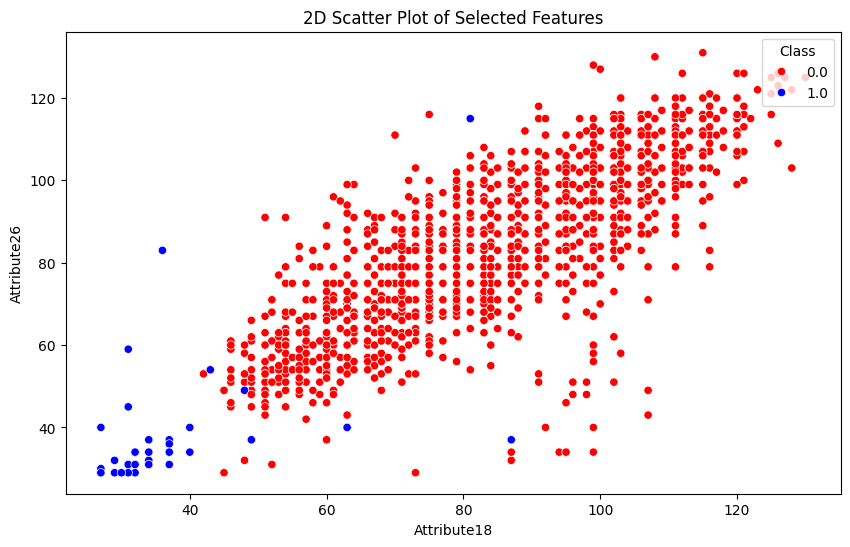

---------------- PLOTTING PAIR 2: 14 Vs 26 --------------------


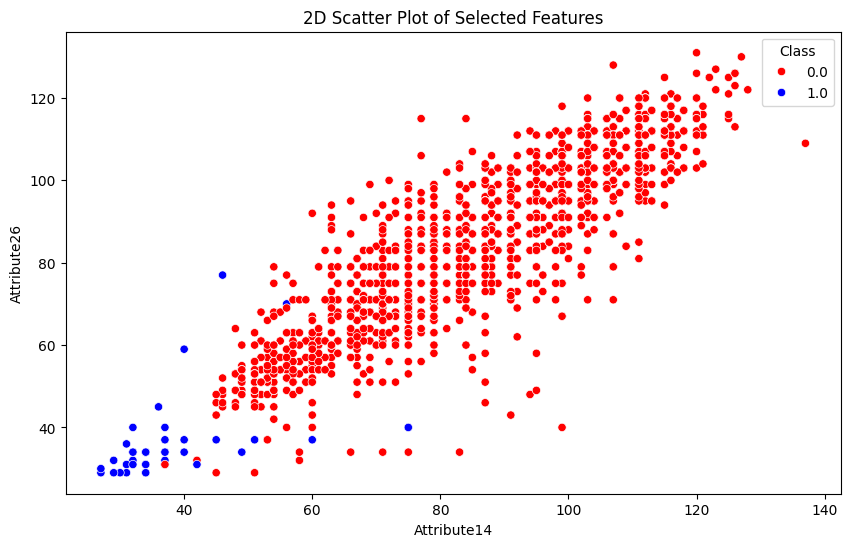

---------------- PLOTTING PAIR 3: 14 Vs 18 --------------------


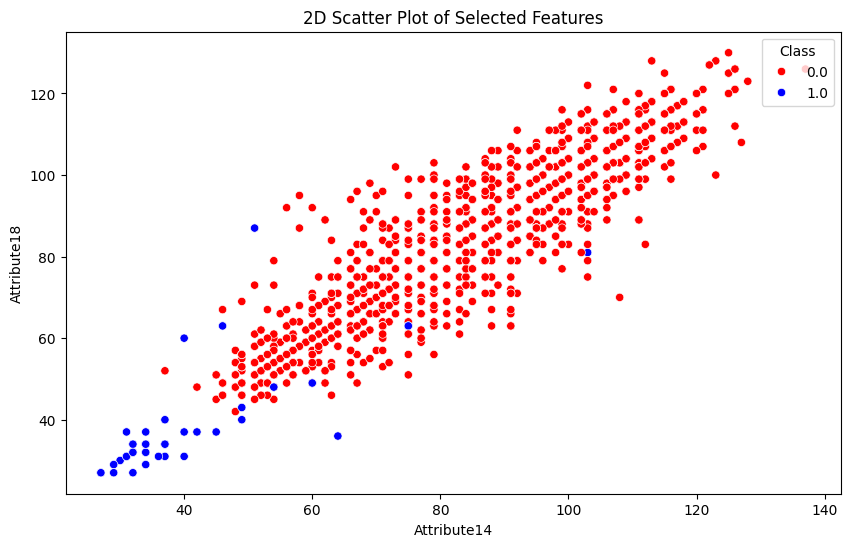

---------------- PLOTTING PAIR 3: 1 Vs 2 --------------------


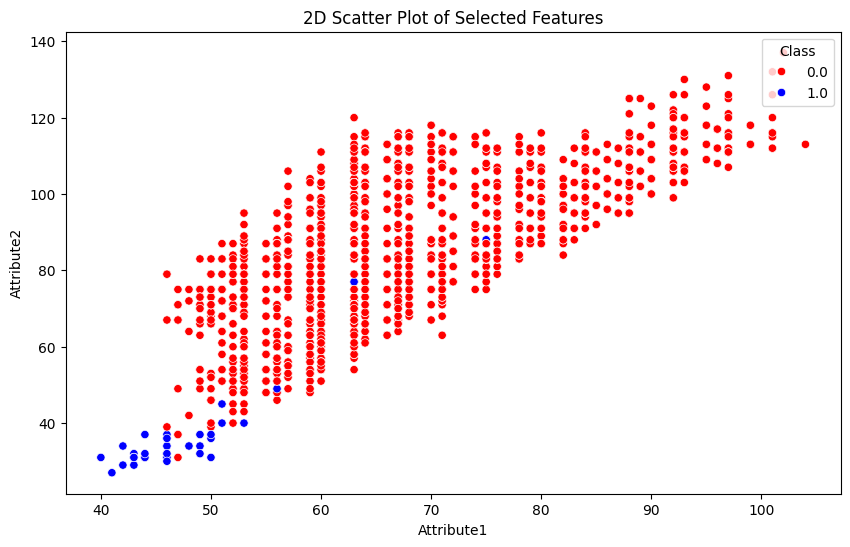

In [ ]:
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for all pairs here so we can see how many components needed
# for gaussian for each pair.

# Choose two features for the 2D plot - Pair 1
f1 = 'Attribute18'
f2 = 'Attribute26'

########################################################################

print("---------------- PLOTTING PAIR 1: 18 Vs 26 --------------------")

X_train_selected = X_train[[f1, f2]]
X_val_selected = X_val[[f1, f2]]

# Scatter plot with different colors for classes
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_selected[f1], y=X_train_selected[f2], hue=y_train, palette={0: 'red', 1: 'blue'})
plt.title('2D Scatter Plot of Selected Features')
plt.xlabel(f1)
plt.ylabel(f2)
plt.legend(title='Class', loc='upper right')
plt.show()

########################################################################

print("---------------- PLOTTING PAIR 2: 14 Vs 26 --------------------")


# Choose two features for the 2D plot - Pair 2
f1 = 'Attribute14'
f2 = 'Attribute26'

X_train_selected = X_train[[f1, f2]]
X_val_selected = X_val[[f1, f2]]

# Scatter plot with different colors for classes
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_selected[f1], y=X_train_selected[f2], hue=y_train, palette={0: 'red', 1: 'blue'})
plt.title('2D Scatter Plot of Selected Features')
plt.xlabel(f1)
plt.ylabel(f2)
plt.legend(title='Class', loc='upper right')
plt.show()

########################################################################

print("---------------- PLOTTING PAIR 3: 14 Vs 18 --------------------")


# Choose two features for the 2D plot - Pair 3
f1 = 'Attribute14'
f2 = 'Attribute18'


# Use only the first two features for simplicity
X_train_selected = X_train[[f1, f2]]
X_val_selected = X_val[[f1, f2]]

# Scatter plot with different colors for classes
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_selected[f1], y=X_train_selected[f2], hue=y_train, palette={0: 'red', 1: 'blue'})
plt.title('2D Scatter Plot of Selected Features')
plt.xlabel(f1)
plt.ylabel(f2)
plt.legend(title='Class', loc='upper right')
plt.show()


########################################################################

print("---------------- PLOTTING PAIR 3: 1 Vs 2 --------------------")


# Choose two features for the 2D plot - Pair 4
f1 = 'Attribute1'
f2 = 'Attribute2'


# Use only the first two features for simplicity
X_train_selected = X_train[[f1, f2]]
X_val_selected = X_val[[f1, f2]]

# Scatter plot with different colors for classes
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_selected[f1], y=X_train_selected[f2], hue=y_train, palette={0: 'red', 1: 'blue'})
plt.title('2D Scatter Plot of Selected Features')
plt.xlabel(f1)
plt.ylabel(f2)
plt.legend(title='Class', loc='upper right')
plt.show()





In [ ]:
'''
Abdullah: Replying to:

Based on your plots, decide how many Gaussian components
(n_components) you need to fit the data (focus on typical satellite images).
Explain. [0.25]

The decision to use a single Gaussian component (n_components=1) was influenced
by the visual examination of above scatter plots representing pairs of features.
In these plots, the red points corresponding to typical satellite images
appeared closely grouped, indicating a relatively uniform distribution.

A single Gaussian component is suitable when the data points exhibit a clear
and compact distribution, making it unnecessary to introduce additional
components to capture distinct clusters.

While the choice of the number of components can vary based on the
characteristics of the data, in this specific case, the concentration
of red points in tight clusters led to the conclusion that a single Gaussian
component is sufficient to model the distribution of typical satellite
images effectively.


n_components = 1 for all the pairs.


----------------------------------------------------------------------
'''

In [ ]:

'''
Abdullah: Replying to
For each pair, find a threshold to maximize your validation set F1 Score

----------------------------------------------------------------

'''
def find_optimal_threshold(y_true, scores):
    thresholds = np.linspace(min(scores), max(scores), 1000)
    f1_scores = [f1_score(y_true, scores < threshold) for threshold in thresholds]
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    return optimal_threshold

# Initialize variables to store results
pair_results = []

# Loop through each pair of features
for pair in [('Attribute18', 'Attribute26'), ('Attribute14', 'Attribute26'), ('Attribute14', 'Attribute18'),
             ('Attribute1', 'Attribute2')]:
    f1, f2 = pair

    # Fit GaussianMixture model with one component on all data points
    gmm = GaussianMixture(n_components=1, random_state=0)
    gmm.fit(X_train[[f1, f2]])

    #  scores for training and validation sets
    scores_train = -gmm.score_samples(X_train[[f1, f2]])
    scores_val = -gmm.score_samples(X_val[[f1, f2]])

    #  AUC on training and validation sets
    auc_train = roc_auc_score(y_train, scores_train)
    auc_val = roc_auc_score(y_val, scores_val)

    # Find optimal threshold for maximizing F1 score on validation set
    optimal_threshold = find_optimal_threshold(y_val, scores_val)

    # Compute F1 score on validation set using optimal threshold
    f1_val = f1_score(y_val, scores_val < optimal_threshold)

    # Store results for the pair
    pair_results.append({
        'Pair': f"{f1} vs {f2}",
        'AUC_Train': auc_train,
        'AUC_Val': auc_val,
        'Optimal Threshold': optimal_threshold,
        'F1_Val': f1_val
    })

# Display the results
pair_results_df = pd.DataFrame(pair_results)
pair_results_df

,Pair,AUC_Train,AUC_Val,Optimal Threshold,F1_Val
0,Attribute18 vs Attribute26,0.970304,0.991745,12.431736,0.025086
1,Attribute14 vs Attribute26,0.954089,0.982749,12.047977,0.025316
2,Attribute14 vs Attribute18,0.969830,0.983808,11.995213,0.025346
3,Attribute1 vs Attribute2,0.841506,0.994814,11.612873,0.025000


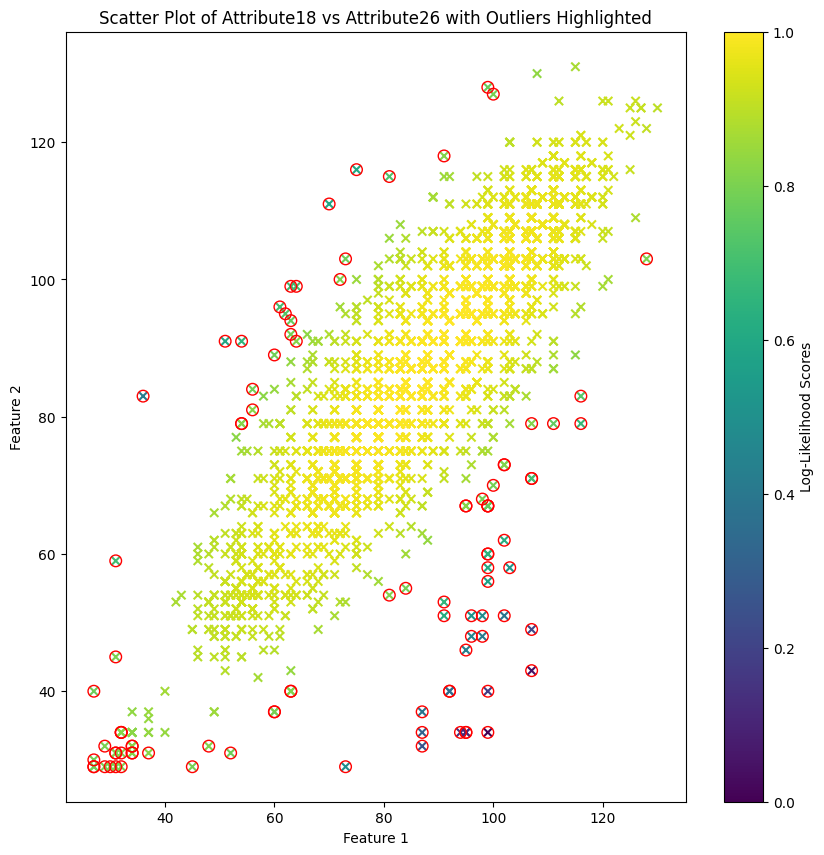

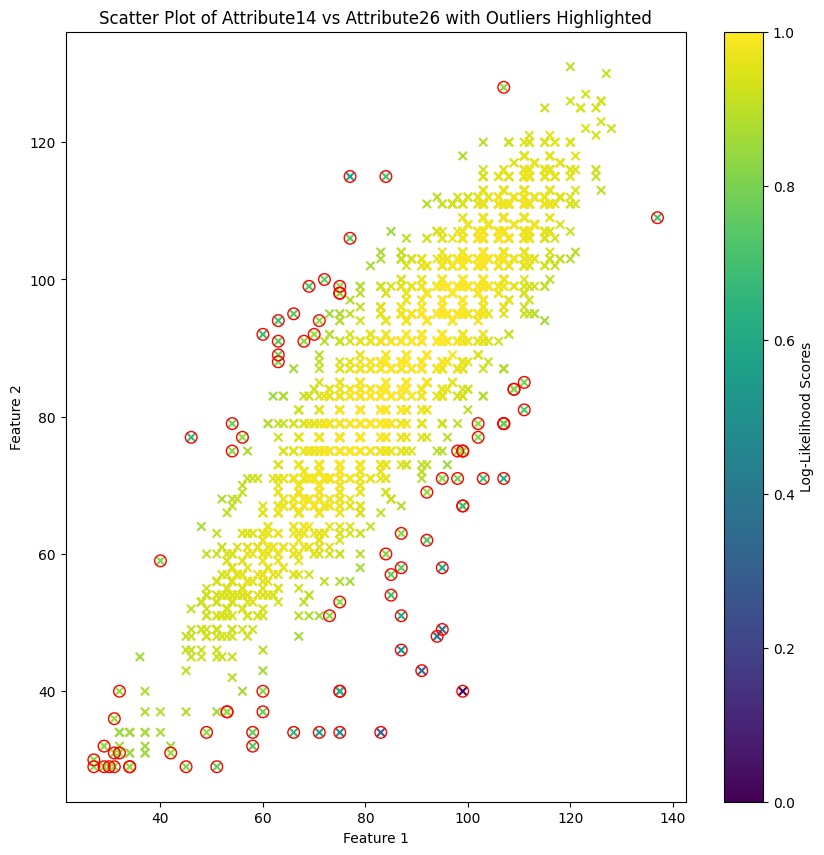

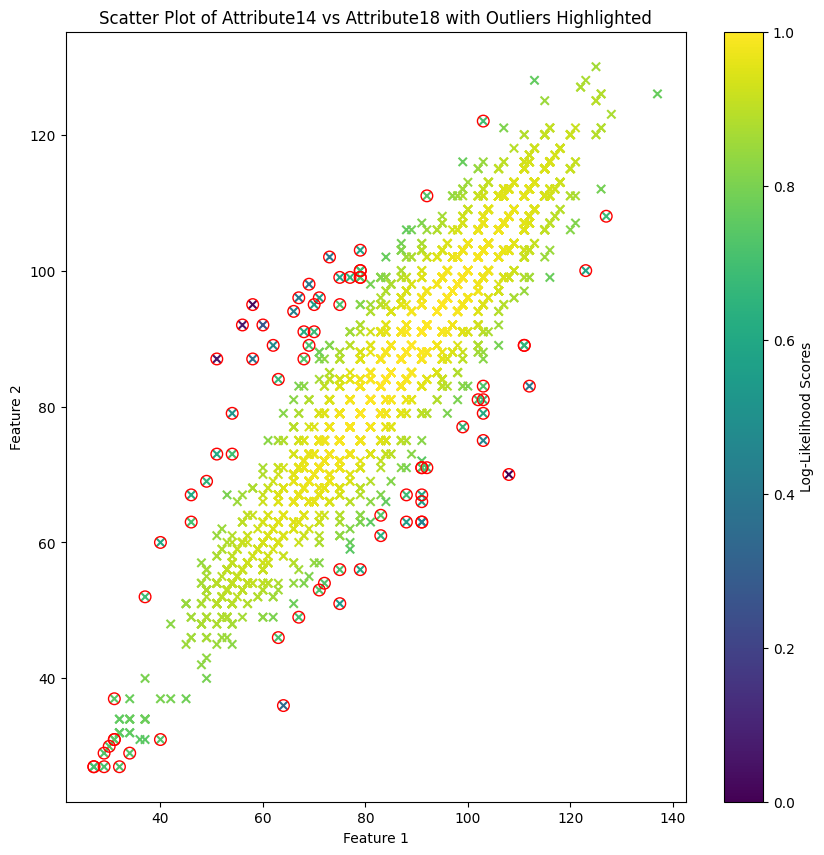

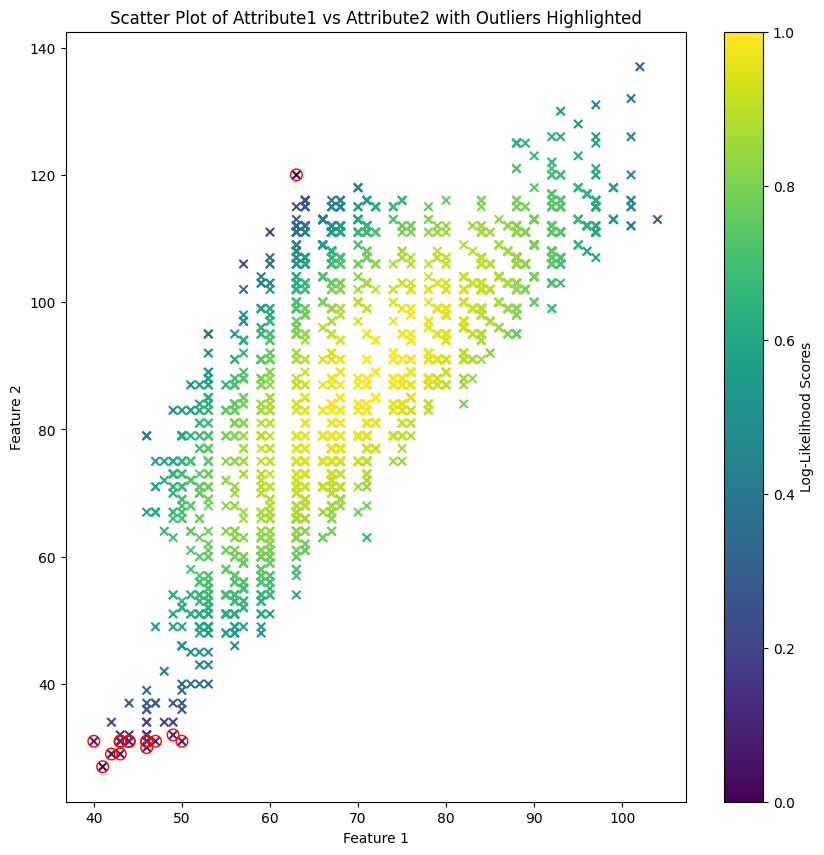

In [ ]:
'''

Abdullah: Replying to

For each pair, plot a figure similar to step 3 and put a circle around outliers
based on your threshold (use the code of the similar figure in the
tutorial) [0.25]

----------------------------------------------------------------


'''

# Loop through each pair of features
for pair in [('Attribute18', 'Attribute26'), ('Attribute14', 'Attribute26'), ('Attribute14', 'Attribute18'),
             ('Attribute1', 'Attribute2')]:
    f1, f2 = pair

    # Use the same features for the 2D plot as those used during GMM fitting
    X_train_selected = X_train[[f1, f2]]

    # Fit GaussianMixture model on the selected features
    gmm = GaussianMixture(n_components=1, random_state=0)
    gmm.fit(X_train_selected)

    plt.figure(figsize=(10, 10))
    c = gmm.score_samples(X_train_selected)

    # Scatter plot with log-likelihood scores as color
    plt.scatter(X_train_selected[f1], X_train_selected[f2], c=c, cmap='viridis', marker='x')

    # Highlight outliers based on the optimal threshold for F1 score
    threshold = -optimal_threshold  # Make sure to use the negative of the optimal threshold
    outliers = X_train_selected[c < threshold]

    # Scatter plot for outliers with 'o' markers
    plt.scatter(outliers[f1], outliers[f2], marker="o", facecolor="none", edgecolor="r", s=70)

    plt.title(f'Scatter Plot of {f1} vs {f2} with Outliers Highlighted')
    plt.xlabel(f'Feature 1')
    plt.ylabel(f'Feature 2')
    plt.colorbar(label='Log-Likelihood Scores')
    plt.show()


## **Part 4: Single feature model with two Gaussian distributions. [2 Marks]**
Now we will use two different distributions for anomalous and typical satellite images.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **typical satellite images** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **anomalous satellite images** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.25]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the image is classified as an anomaly. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the image is an anomaly (the image belongs to the $G_2$ distribution which represents anomalous satellite images). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.25]**
  5. Repeat the steps above for all the features. What is the best F1 Score that you get for training and validation? Which feature and what c? **[1]**

In [ ]:

# Variables to store results
g1_distributions = {}
g2_distributions = {}
s1_scores = {}
s2_scores = {}
optimal_c_values = {}
best_f1_scores = {}

# Loop through each feature
for feature in X_train.columns:
    g1 = GaussianMixture(n_components=1, random_state=0)
    g1.fit(X_train[[feature]][y_train == 0]) #G1
    g1_distributions[feature] = g1

    g2 = GaussianMixture(n_components=1, random_state=0)
    g2.fit(X_train[[feature]][y_train == 1]) #G2
    g2_distributions[feature] = g2

    # Compute score samples for both G1 and G2 on the validation set
    s1_scores[feature] = -g1.score_samples(X_val[[feature]])
    s2_scores[feature] = -g2.score_samples(X_val[[feature]])

    # Find the optimal c value that maximizes validation set F1 Score
    f1_scores = []
    c_values = np.arange(0, 10.1, 0.1)
    for c in c_values:
        predictions = s1_scores[feature] < (c * s2_scores[feature])
        f1 = f1_score(y_val, predictions)
        f1_scores.append(f1)

    # Find the index of the maximum F1 Score
    optimal_index = np.argmax(f1_scores)

    # Store optimal c value and F1 Score
    optimal_c_values[feature] = c_values[optimal_index]
    best_f1_scores[feature] = f1_scores[optimal_index]

# Find the feature with the best F1 Score and corresponding optimal c value
best_feature = max(best_f1_scores, key=best_f1_scores.get)
best_c_value = optimal_c_values[best_feature]
best_f1_score = best_f1_scores[best_feature]

# Print the results
print(f"Best F1 Score on validation set: {best_f1_score:.3f}")
print(f"Best feature: {best_feature}")
print(f"Optimal c value for {best_feature}: {best_c_value:.2f}")


Best F1 Score on validation set: 0.025
Best feature: Attribute3
Optimal c value for Attribute3: 1.30


## **Part 5: Multivariate and Mixture of Gaussians Distribution [4 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate).
*   To fit your model, you can take advantage of the Gaussian mixture model, where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).
*   You can choose to fit your Gaussians on typical satellite images or to both classes.


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[4]**


**HINT !**

You might want to try a two-gaussian model, multiple features, a single component for the typical satellite images, and multiple components for anomalous ones! Why does it make sense to have multiple components for anomalous satellite images?

In [ ]:
### YOUR CODE HERE ###

'''

Abdullah: Brief code explanation


In designing the model, I implemented a systematic approach to explore
various configurations using Gaussian Mixture Models (GMMs). Employing
nested loops, I iterated over the number of components, number of Gaussians,
fitting strategies (typical images only or both classes), and different feature
subset sizes. This allowed the experimentation with a multitude of models
leading to a comprehensive evaluation. For each configuration
I computed AUC scores on both the training and validation sets, providing
insights into the models' ability to capture anomalous patterns. Additionally
I identified the optimal threshold for each model, maximizing the F1 score on
the validation set. The results were organized into a DataFrame, facilitating
a detailed analysis.


48 options tried


'''


model_results = []

# Iterate through different model configurations
for num_components in range(1, 3):  #number of components
    for num_gaussians in range(1, 2):  #number of Gaussians
        for fit_on_typical in [True, False]:  # Fit on typical or both classes
            for feature_subset_size in range(1, 36, 3):  # Vary the number of features
                # Select a subset of features
                selected_features = X_train.columns[:feature_subset_size]

                # Initialize GaussianMixture model
                gmm = GaussianMixture(n_components=num_components, random_state=0)

                # Fit on typical or both classes based on fit_on_typical
                if fit_on_typical:
                    gmm.fit(X_train[selected_features][y_train == 0])
                else:
                    gmm.fit(X_train[selected_features])

                # Train score
                train_scores = -gmm.score_samples(X_train[selected_features])

                # Val score
                val_scores = -gmm.score_samples(X_val[selected_features])

                # Find an optimal threshold that maximizes F1 Score on the validation set
                thresholds = np.linspace(min(val_scores), max(val_scores), 1000)
                f1_scores = [f1_score(y_val, val_scores < threshold) for threshold in thresholds]
                optimal_threshold = thresholds[np.argmax(f1_scores)]
                optimal_f1 = max(f1_scores)

                #  AUC score on training set
                auc_train = roc_auc_score(y_train, train_scores)

                # AUC score on validation set
                auc_val = roc_auc_score(y_val, val_scores)

                # results in a dictionary
                result = {
                    'NumComponents': num_components,
                    'NumGaussians': num_gaussians,
                    'FitOnTypical': fit_on_typical,
                    'FeatureSubsetSize': feature_subset_size,
                    'AUCTrain': auc_train,
                    'AUCVal': auc_val,
                    'OptimalThreshold': optimal_threshold,
                    'OptimalF1': optimal_f1,
                    'AddedFeatures': ', '.join([str(i) for i in range(1, feature_subset_size + 1)])  # New column indicating added features
                }

                # Append the results to the list
                model_results.append(result)

# Convert to a DataFrame for easier analysis
results_df = pd.DataFrame(model_results)

# the results DataFrame
results_df

,NumComponents,NumGaussians,FitOnTypical,FeatureSubsetSize,AUCTrain,AUCVal,OptimalThreshold,OptimalF1,AddedFeatures
0,1,1,True,1,0.824249,0.991163,6.317808,0.025000,1
1,1,1,True,4,0.870935,0.997672,69.918281,0.022727,"1, 2, 3, 4"
2,1,1,True,7,0.948581,0.997989,86.000577,0.022727,"1, 2, 3, 4, 5, 6, 7"
3,1,1,True,10,0.953961,0.998201,106.017008,0.022727,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10"
4,1,1,True,13,0.974780,0.997672,114.140546,0.022727,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13"
5,1,1,True,16,0.989558,0.997672,152.950353,0.022727,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,..."
6,1,1,True,19,0.996324,0.997354,165.164777,0.022727,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,..."
7,1,1,True,22,0.997369,0.997037,176.722674,0.022727,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,..."
8,1,1,True,25,0.997515,0.996931,191.692125,0.022727,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,..."
9,1,1,True,28,0.997055,0.996296,204.382943,0.022727,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,..."


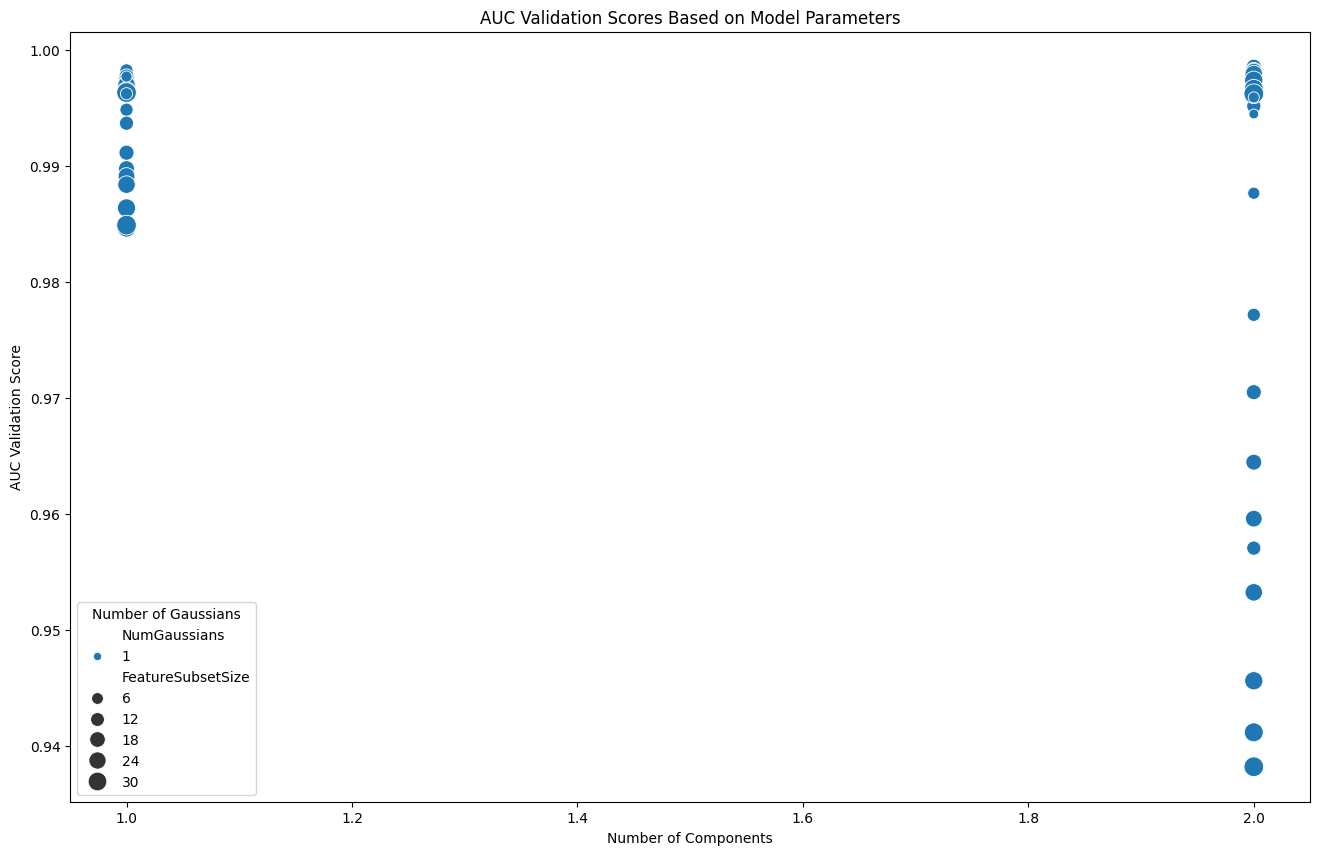

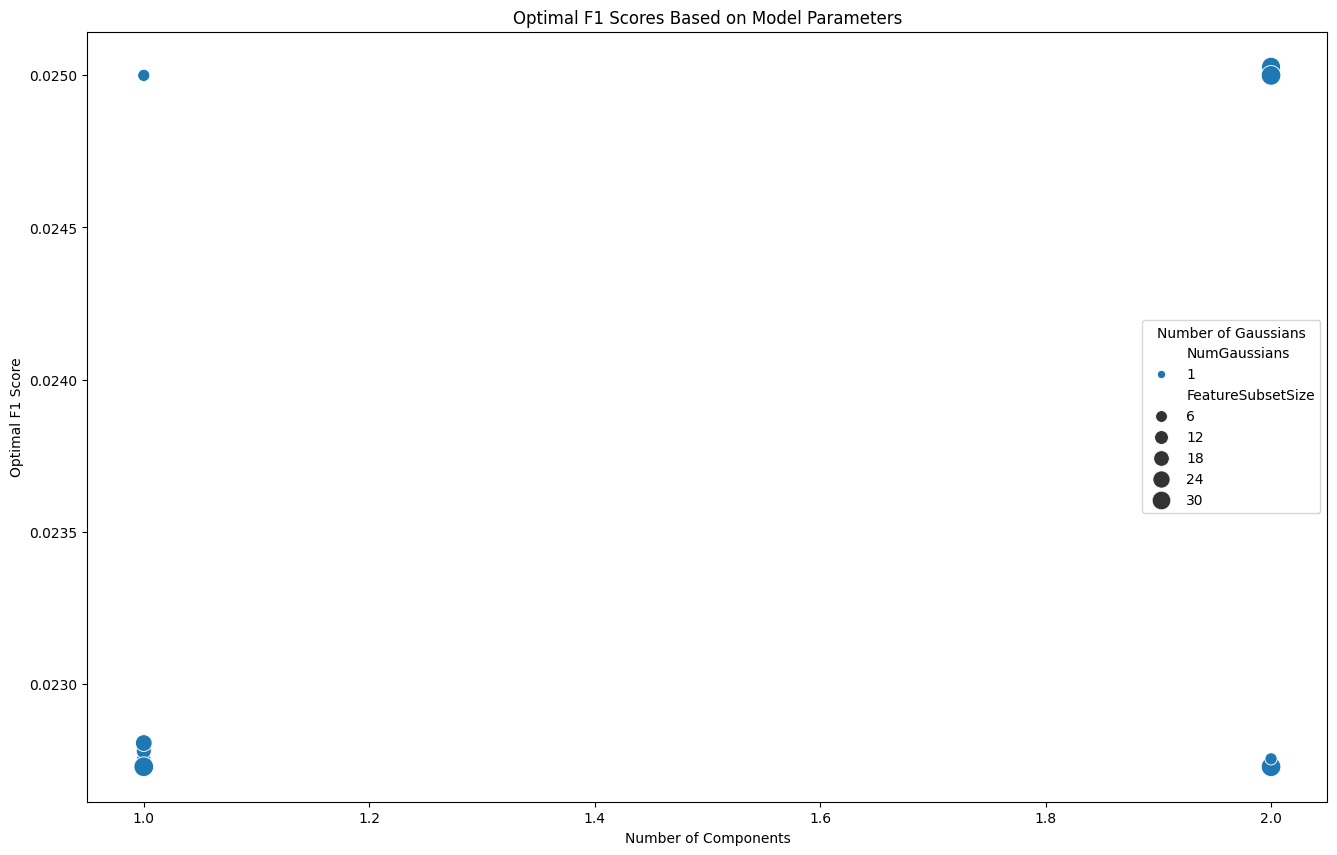

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize AUC and F1 scores based on NumComponents, NumGaussians, and FeatureSubsetSize
plt.figure(figsize=(16, 10))
sns.scatterplot(data=results_df, x='NumComponents', y='AUCVal', hue='NumGaussians', size='FeatureSubsetSize', sizes=(50, 200))
plt.title('AUC Validation Scores Based on Model Parameters')
plt.xlabel('Number of Components')
plt.ylabel('AUC Validation Score')
plt.legend(title='Number of Gaussians')
plt.show()

plt.figure(figsize=(16, 10))
sns.scatterplot(data=results_df, x='NumComponents', y='OptimalF1', hue='NumGaussians', size='FeatureSubsetSize', sizes=(50, 200))
plt.title('Optimal F1 Scores Based on Model Parameters')
plt.xlabel('Number of Components')
plt.ylabel('Optimal F1 Score')
plt.legend(title='Number of Gaussians')
plt.show()


In [ ]:
'''
Abdullah Replying to:

What kind of model works better?
How many features are best (and which ones)?
How many Gaussians? How many components?
--------------------------------------------------------

'''



# best-performing mode (multiple models have same optimal F1 but I am picking one here to show the results)
best_model_params = results_df.loc[12]

# Display the details of the best-performing model
print("Best Performing Model:")
print(best_model_params)

Best Performing Model:
NumComponents               1
NumGaussians                1
FitOnTypical            False
FeatureSubsetSize           1
AUCTrain             0.824249
AUCVal               0.991163
OptimalThreshold     6.203252
OptimalF1               0.025
AddedFeatures               1
Name: 12, dtype: object


## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**


In [ ]:
### YOUR CODE HERE ###

# best mode config
best_model_params = results_df.loc[12]

# model params from the dataframe
num_components = int(best_model_params['NumComponents'])
num_gaussians = int(best_model_params['NumGaussians'])
feature_subset_size = int(best_model_params['FeatureSubsetSize'])

best_gmm = GaussianMixture(n_components=1, random_state=0)

# fit_on_typical is false so using both classes
best_gmm.fit(X_train.iloc[:, :feature_subset_size])

# score samples on the test set
test_scores = -best_gmm.score_samples(X_test.iloc[:, :feature_subset_size])

# Use the optimal threshold to classify anomalies
optimal_threshold = best_model_params['OptimalThreshold']
predictions = test_scores < optimal_threshold

# Calculate metrics
f1_test = f1_score(y_test, predictions)
precision_test = precision_score(y_test, predictions)
recall_test = recall_score(y_test, predictions)

# Print the results
print(f"F1 Score on Test Set: {f1_test:.3f}")
print(f"Precision on Test Set: {precision_test:.3f}")
print(f"Recall on Test Set: {recall_test:.3f}")


F1 Score on Test Set: 0.032
Precision on Test Set: 0.016
Recall on Test Set: 1.000


## **Part 7: Is Gaussian the only useful distribution? [1 Mark]**

Search for other distributions that could be used to model the data. How popular are they? Is there a specific situation where a distribution works better? How can we find a suitable distribution to model our data? Do not forget to include your references.




In [ ]:
'''
--- Cauchy Distribution:

Ref: https://www.sciencedirect.com/topics/mathematics/cauchy-distribution

The Cauchy distribution, also known as the Lorentz distribution,
is a probability distribution characterized by its heavy tails and
lack of defined mean and variance. Unlike the Gaussian distribution
the Cauchy distribution has tails that decrease more slowly.
It is commonly employed in various fields, including physics and finance
where heavy-tailed data is present. The distribution is particularly useful
for modeling situations where extreme values are likely to occur.

--- Weibull Distribution:

Ref: https://encyclopediaofmath.org/index.php?title=Weibull_distribution&oldid=18906

The Weibull distribution is a versatile probability distribution widely
utilized in reliability engineering, survival analysis, and various fields
to model time-to-failure data. It is characterized by its flexibility to
exhibit a variety of shapes, including exponential, normal, and heavy-tailed
distributions, depending on the value of its shape parameter.
The distribution is particularly suitable for modeling lifetimes
of systems or components, capturing both early and late failure behaviors.

--- Beta Distribution

Ref: https://towardsdatascience.com/beta-distribution-intuition-examples-and-derivation-cf00f4db57af

The Beta distribution is a continuous probability distribution defined on
the interval [0, 1], making it suitable for modeling random variables that
represent proportions or probabilities. It is characterized by two shape
parameters, α (alpha) and β (beta), which determine the distribution's shape.
The Beta distribution is versatile and finds applications in various fields,
such as Bayesian statistics, machine learning, and quality control.


--- Poisson Distribution

Ref: https://brilliant.org/wiki/poisson-distribution/

The Poisson distribution is a discrete probability distribution that
describes the number of events occurring in a fixed interval of time or
space, given a constant average rate of occurrence. It is particularly useful
for modeling rare events or phenomena where the events are independent and
occur with a known average rate. The distribution is characterized by a
single parameter, λ (lambda), representing the average rate of events.
The Poisson distribution is widely applied in various fields such as
epidemiology, telecommunications, and queuing theory.
-----------------------------------------------------------------------------

How popular are they?

Ref: https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm

The popularity of probability distributions including the Cauchy, Weibull,
Beta, and Poisson distributions, depends on their applicability to
different types of data and scenarios. Each distribution is commonly
used in specific fields and contexts.

Cauchy Distribution: The Cauchy distribution is less commonly used than
some other distributions due to its heavy tails and undefined moments.
However, it finds applications in physics and signal processing,
especially when dealing with symmetric distributions with heavy tails.

Weibull Distribution: The Weibull distribution is widely used in
reliability engineering to model the time until failure of components.
It is versatile and can represent different types of failure patterns.
The Weibull distribution is popular in reliability and survival analysis.

Beta Distribution: The Beta distribution is commonly used in
Bayesian statistics, representing a probability distribution of probabilities.
It is versatile and flexible, making it useful in various applications,
such as modeling proportions, uncertainty, and risk.

Poisson Distribution: The Poisson distribution is widely used in situations
where events occur independently at a constant average rate. It is
frequently applied in fields such as telecommunications, insurance,
and queuing theory to model the number of events within a fixed interval.

Out of all the distributions I have used, the most popular one is gaussian.
-----------------------------------------------------------------------------

Is there a specific situation where a distribution works better?

Ref: https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm

In general, the choice of a probability distribution depends on the specific
characteristics and patterns observed in the data. Different distributions
are suitable for different scenarios based on the nature of the data and the
phenomenon being modeled. Researchers often consider factors such as symmetry,
tails, and underlying patterns when selecting a distribution for their data.


The Cauchy distribution is particularly useful when dealing with data
containing outliers or extreme values due to its heavy-tailed nature.

The Weibull distribution finds application in reliability engineering,
providing an effective model for time-to-failure data with varying hazard rates.

The Beta distribution is versatile, commonly employed in Bayesian
statistics for modeling uncertainties and proportions, making it suitable for
a wide range of applications.

The Poisson distribution is chosen for scenarios where events occur
independently at a constant rate within fixed intervals, making it suitable
for count data modeling in various fields.
------------------------------------------------------------------------------

How can we find a suitable distribution to model our data?

Ref:
https://towardsdatascience.com/how-to-find-the-best-theoretical-distribution-for-your-data-a26e5673b4bd
https://medium.com/@sigari.salman/discovering-the-best-fit-probability-distribution-for-your-data-a14c0e8d762#:~:text=To%20determine%20which%20distribution%20is,and%20the%20chi%2Dsquared%20test.
https://statisticsbyjim.com/hypothesis-testing/identify-distribution-data/


Finding a suitable distribution to model data involves a combination of
statistical analysis.


Conduct thorough exploratory data analysis to understand the characteristics
of the data, including its shape, central tendency, and variability.

Create a histogram to visualize the data distribution and calculate
summary statistics such as mean, median, and standard deviation.


Utilize probability plots (Q-Q plots) to compare the distribution of the
data against theoretical distributions. Deviations from a straight line
in the Q-Q plot may indicate a poor fit.

Apply statistical tests to assess goodness-of-fit, such as the
Kolmogorov-Smirnov test, Anderson-Darling test, or chi-square test.


Consider the nature of the data and the underlying processes.
Domain-specific insights can guide the selection of an appropriate distribution.

Compare the fit of different distributions using information criteria
to identify the model that balances goodness-of-fit and model complexity.

Finally, we can perform literature review to see what kind of problems are
addressed by which models.
------------------------------------------------------------------------------

'''